In [1]:
%%shell

cd /content

# Install pycocotools
git clone https://github.com/cocodataset/cocoapi.git
cd cocoapi/PythonAPI
python setup.py build_ext install

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 27.10 MiB/s, done.
Resolving deltas: 100% (576/576), done.
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/pycocotools
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -I../common -I/u

In [2]:
#%%shell
#wget http://images.cocodataset.org/zips/val2017.zip
#wget http://images.cocodataset.org/annotations/stuff_annotations_trainval2017.zip
#unzip val2017.zip
#!unzip stuff_annotations_trainval2017.zip

In [3]:
! wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip

--2020-08-14 08:52:15--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.143.204
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.143.204|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  96.0MB/s    in 2.5s    

2020-08-14 08:52:18 (96.0 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]



In [4]:
!unzip annotations_trainval2017.zip

Archive:  annotations_trainval2017.zip
  inflating: annotations/instances_train2017.json  
  inflating: annotations/instances_val2017.json  
  inflating: annotations/captions_train2017.json  
  inflating: annotations/captions_val2017.json  
  inflating: annotations/person_keypoints_train2017.json  
  inflating: annotations/person_keypoints_val2017.json  


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [32]:


%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (12.0, 12.0)



In [7]:
dataDir='/content'
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [8]:
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.63s)
creating index...
index created!


In [10]:
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('First 20 COCO categories: \n{}'.format(' '.join(nms[:20])))
print(f"Overall {len(nms)} categories\n")

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))
print(f"Overall {len(nms)} supercategories")

First 20 COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow
Overall 80 categories

COCO supercategories: 
accessory animal furniture indoor appliance sports outdoor person vehicle kitchen electronic food
Overall 12 supercategories


In [127]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['dog']);
imgIds = coco.getImgIds(catIds=catIds );
print("Type of imgIds: ", type(imgIds), "\nimgIds: ", imgIds[:10], "\nSize: ", len(imgIds))
#imgIds = coco.getImgIds(imgIds = [539143])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
print(f"\nType of img: {type(img)}")
print(f"img keys: {img.keys()}")

Type of imgIds:  <class 'list'> 
imgIds:  [329219, 404484, 205834, 546829, 554002, 366611, 182805, 395801, 427034, 61471] 
Size:  177

Type of img: <class 'dict'>
img keys: dict_keys(['license', 'file_name', 'coco_url', 'height', 'width', 'date_captured', 'flickr_url', 'id'])


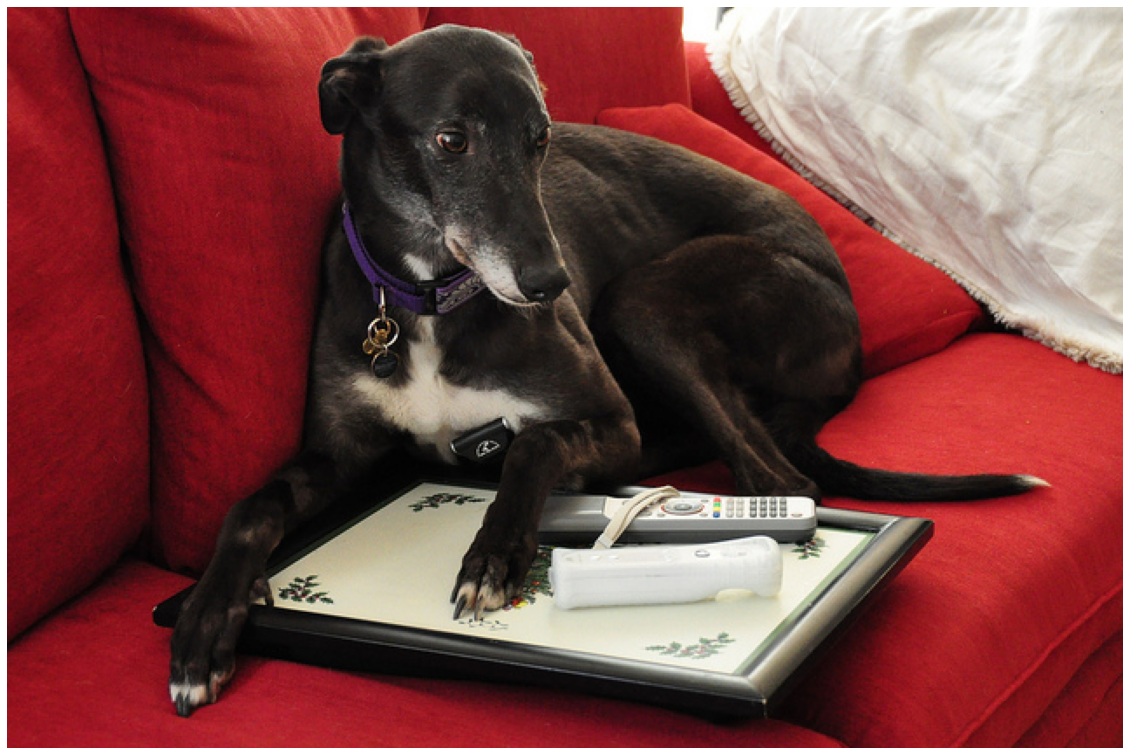

In [128]:
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

In [17]:
# plt.imshow(I); plt.axis('off')
# annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
# anns = coco.loadAnns(annIds)
# print(anns)
# coco.showAnns(anns)

# Let's look at some pictures

In [129]:
b_catIds = coco.getCatIds(catNms=['dog']);
b_imgIds = coco.getImgIds(catIds=b_catIds );
b_images = coco.loadImgs(ids=b_imgIds)
raw_images = [io.imread(b_images[i]['coco_url']) for i in range(10)]

In [130]:
print(f"Type of b_images: {type(b_images)}")
print(f"Type of b_images[0]: {type(b_images[0])}")
print(f"Keys of b_images[0]: {b_images[0].keys()}")
print(f"Type of raw_images: {type(raw_images)}")
print(f"Type of raw_images[0]: {type(raw_images[0])}")
print(f"Shape of raw_images[0]: {raw_images[0].shape}")

Type of b_images: <class 'list'>
Type of b_images[0]: <class 'dict'>
Keys of b_images[0]: dict_keys(['license', 'file_name', 'coco_url', 'height', 'width', 'date_captured', 'flickr_url', 'id'])
Type of raw_images: <class 'list'>
Type of raw_images[0]: <class 'numpy.ndarray'>
Shape of raw_images[0]: (427, 640, 3)


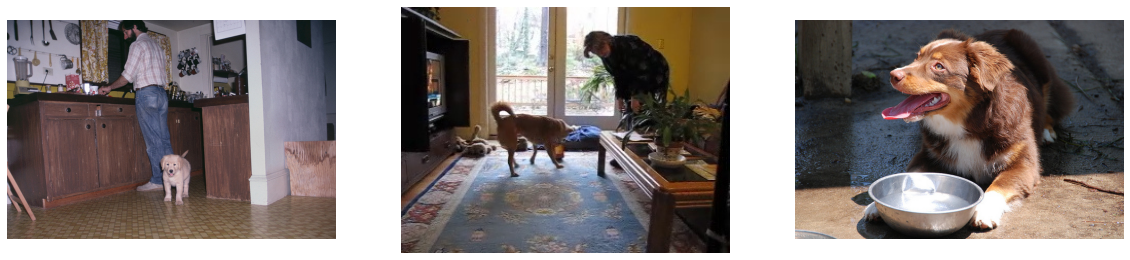

In [131]:
# fig = plt.figure(figsize=(12, 12))
start = 0
pylab.rcParams['figure.figsize'] = (20, 20)
for j in range(3):
  I = raw_images[start + j]
  plt.subplot(1, 3, j + 1)
  plt.axis('off')
  plt.imshow(I)

# Loading Resnet18

In [114]:
import torch
import torchvision
from torchvision import transforms
from torchvision.models import resnet18

In [115]:
model = resnet18(pretrained=True)

In [116]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

# Indices to labels map

In [117]:
import json

In [118]:
map_path = '/content/drive/My Drive/Course Work/Algo 2014/ind_to_img.json'
with open(map_path, 'r') as file:
  ind_to_labels = json.load(file)

In [119]:
list(ind_to_labels.keys())[:5]

['0', '1', '2', '3', '4']

In [137]:
def labels_to_ind(cat):
  for ind, category in ind_to_labels.items():
    if cat in category:
      return ind

In [139]:
labels_to_ind('dog'), labels_to_ind('cat')

('153', '30')

# Backprop

In [134]:
index = 2
H, W, C = raw_images[5].shape
new_image = raw_images[5].reshape((C, H, W))
# plt.imshow(new_image.reshape((H, W, C)))
print(f"Type: {type(new_image)}")
print(f"Shape: {new_image.shape}")
print(f"Min: {new_image.min()}; Max: {new_image.max()}")
new_image = new_image / 255.
print(f"Min: {new_image.min()}; Max: {new_image.max()}")

new_tensor = torch.tensor(new_image, requires_grad=True)
print(f"new_tensor type: {type(new_tensor)}")
print(f"new_tensor min: {new_tensor.min()}")
print(f"new_tensor max: {new_tensor.max()}")
print(f"new_tensor mean: {new_tensor.mean()}")
print(f"new_tensor mean: {new_tensor.std()}")

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
new_tensor = torch.reshape(normalize(new_tensor), (1, C, H, W))
print(f"new_tensor min: {new_tensor.min()}")
print(f"new_tensor max: {new_tensor.max()}")
print(f"new_tensor mean: {new_tensor.mean()}")
print(f"new_tensor mean: {new_tensor.std()}")


new_output = model(new_tensor.float())
print(f"new_output type: {type(new_output)}")
print(f"new_output[0] type: {type(new_output[0])}")
print(f"new_output[0] shape: {new_output[0].shape}")

sorted_tensor, sorted_indices = torch.sort(new_output, descending=True)
print(f"Type: {type(sorted_tensor)}")
print(f"Type of indices: {type(sorted_indices)}")
print(sorted_indices[0][:10])

for el in sorted_indices[0][:10].numpy():
  print(ind_to_labels[str(el)])

# current_score = new_output[0][3]
# print(f"Current score: {current_score}")

# current_score.backward()
# print(f"Input derivative: {new_tensor.grad}")
# print(f"Input derivative shape: {new_tensor.grad.shape}")
# print(f"Input derivative max: {new_tensor.grad.max()}")

Type: <class 'numpy.ndarray'>
Shape: (3, 478, 640)
Min: 0; Max: 255
Min: 0.0; Max: 1.0
new_tensor type: <class 'torch.Tensor'>
new_tensor min: 0.0
new_tensor max: 1.0
new_tensor mean: 0.45012893712232266
new_tensor mean: 0.22167392218469983
new_tensor min: -2.0151554071410223
new_tensor max: 2.6399999999999997
new_tensor mean: 0.0026081517137627338
new_tensor mean: 0.934165403127354
new_output type: <class 'torch.Tensor'>
new_output[0] type: <class 'torch.Tensor'>
new_output[0] shape: torch.Size([1000])
Type: <class 'torch.Tensor'>
Type of indices: <class 'torch.Tensor'>
tensor([463, 731, 600, 412, 898, 899, 700, 618, 733, 428])
bucket, pail
plunger, plumber's helper
hook, claw
ashcan, trash can, garbage can, wastebin, ash bin, ash-bin, ashbin, dustbin, trash barrel, trash bin
water bottle
water jug
paper towel
ladle
pole
barrow, garden cart, lawn cart, wheelbarrow
